In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from scipy.stats import linregress
import scipy.stats as st
import hvplot.pandas

#Path to CSV
final_df_csv = Path("final_df.csv")
final_df = pd.read_csv(final_df_csv)

In [2]:
#Create linear regression function
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = np.array(x_values) * slope + intercept
    plt.plot(x_values, regress_values, "r-")
    equation = f"y= {round(slope,2)}x + {round(intercept,2)}"
    annotation_x = max(x_values)
    annotation_y = regress_values[-1]
    plt.annotate(equation, (annotation_x, annotation_y), color="r", fontsize=15)
    r_text = f"r-value = {round(rvalue, 3)}"
    plt.text(min(x_values), min(y_values), r_text, color="r", fontsize=12)

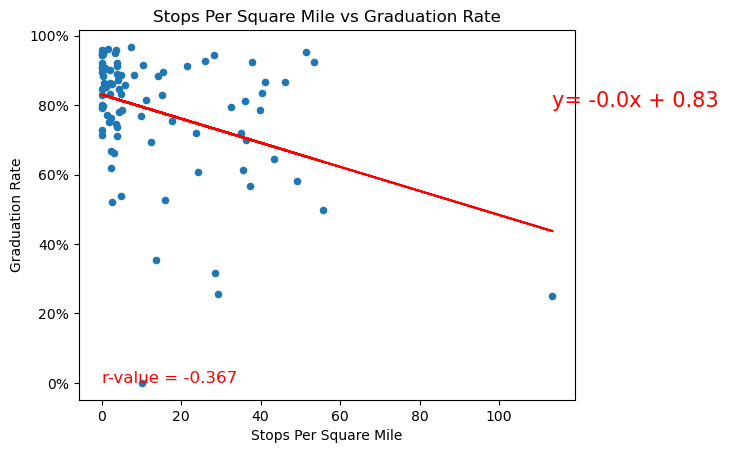

In [3]:
#Stops Per Square Mile vs Graduation Rate
x_values = final_df["stops_per_sqmile"]
y_values = final_df["GradRate"]

transport_grad = final_df.plot(kind="scatter",x="stops_per_sqmile",y="GradRate",grid=False,
                              xlabel="Stops Per Square Mile",
                              ylabel="Graduation Rate",
                              title="Stops Per Square Mile vs Graduation Rate")
transport_grad.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0,decimals=0))
linear_regression(x_values, y_values)
plt.show()

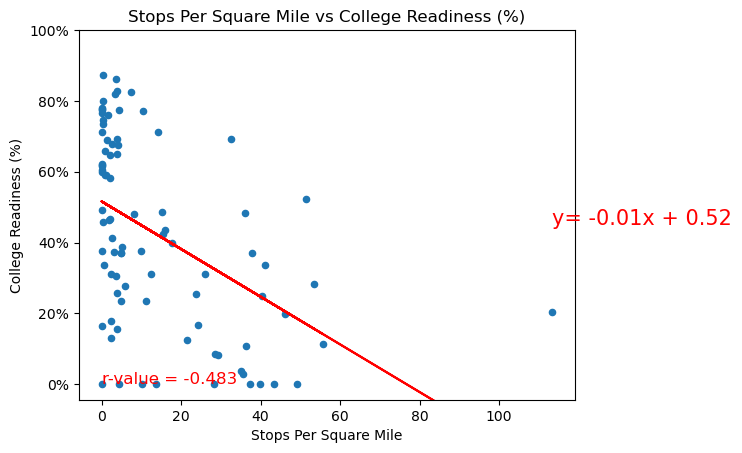

In [4]:
#Stops Per Square Mile vs College Readiness (%)
x_values = final_df["stops_per_sqmile"]
y_values = final_df["EBRWPctReady"]

transport_readiness = final_df.plot(kind="scatter",x="stops_per_sqmile",y="EBRWPctReady",grid=False,
                                   xlabel="Stops Per Square Mile",
                                   ylabel="College Readiness (%)",
                                   title="Stops Per Square Mile vs College Readiness (%)")
transport_readiness.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0,decimals=0))
transport_readiness.set_ylim(top=1)
linear_regression(x_values, y_values)
plt.show()

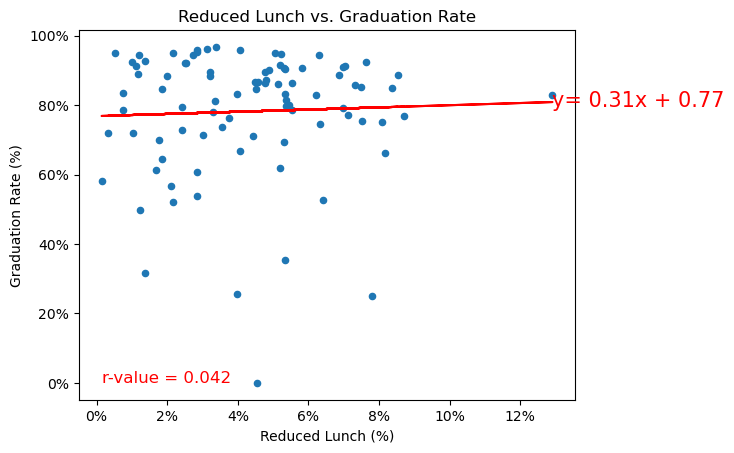

In [5]:
#Reduced Lunch vs. Grad Rate Scatter
x_values = final_df["PCT_Reduced"]
y_values = final_df["GradRate"]

reduced_grad = final_df.plot(kind="scatter", x="PCT_Reduced", y="GradRate", grid=False,
              xlabel="Reduced Lunch (%)",
              ylabel="Graduation Rate (%)",
              title="Reduced Lunch vs. Graduation Rate")
reduced_grad.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))
reduced_grad.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))
linear_regression(x_values, y_values)
plt.show()

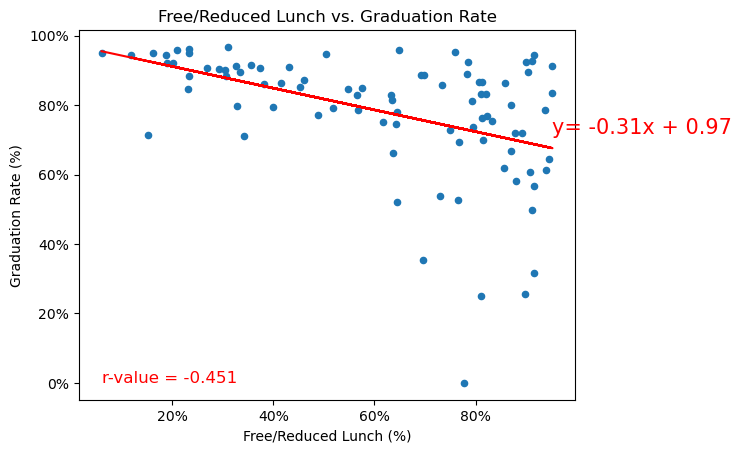

In [6]:
#Free and Reduced Lunch vs. Grad Rate Scatter
x_values = final_df["PCT_FreeReduced"]
y_values = final_df["GradRate"]

freereduced_grad = final_df.plot(kind="scatter", x="PCT_FreeReduced", y="GradRate", grid=False,
              xlabel="Free/Reduced Lunch (%)",
              ylabel="Graduation Rate (%)",
              title="Free/Reduced Lunch vs. Graduation Rate")
freereduced_grad.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))
freereduced_grad.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))
linear_regression(x_values, y_values)
plt.show()

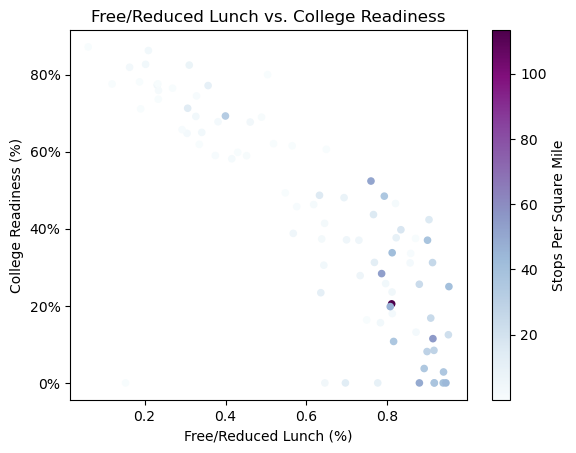

In [7]:
#Free/Reduced Lunch vs. College Readiness by Transit Stops
reduced_ready_by_stops_sqmile = final_df.plot(kind="scatter",
                         x="PCT_FreeReduced",
                         y="EBRWPctReady",
                         c=final_df["stops_per_sqmile"],
                         colorbar=True,
                         cmap="BuPu",
                         grid=False,
                         xlabel="Free/Reduced Lunch (%)",
                         ylabel="College Readiness (%)",
                         title="Free/Reduced Lunch vs. College Readiness")
clb = reduced_ready_by_stops_sqmile.collections[0].colorbar
clb.set_label("Stops Per Square Mile")
reduced_ready_by_stops_sqmile.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))

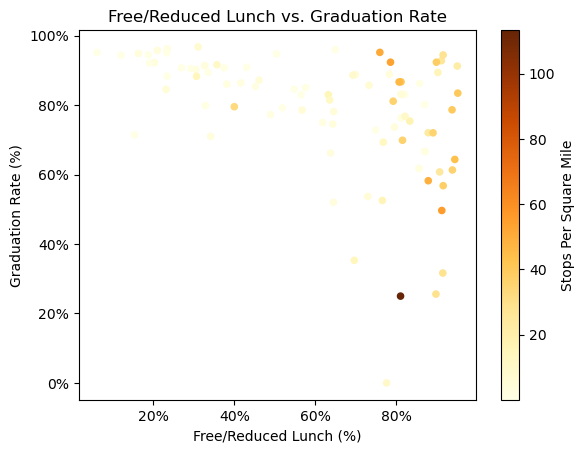

In [8]:
#Free/Reduced Lunch vs. Graduation Rate by Transit Stops
reduced_grad_by_stops_per_sqmile = final_df.plot(kind="scatter",
                         x="PCT_FreeReduced",
                         y="GradRate",
                         c=final_df["stops_per_sqmile"],
                         colorbar=True,
                         cmap="YlOrBr",
                         grid=False,
                         xlabel="Free/Reduced Lunch (%)",
                         ylabel="Graduation Rate (%)",
                         title="Free/Reduced Lunch vs. Graduation Rate")
clb = reduced_grad_by_stops_per_sqmile.collections[0].colorbar
clb.set_label("Stops Per Square Mile")
reduced_grad_by_stops_per_sqmile.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))
reduced_grad_by_stops_per_sqmile.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))

In [10]:
map_plot = final_df.hvplot.points("Longitude",
                                  "Latitude",
                                  geo=True,
                                  tiles = "OSM",
                                  frame_width = 900,
                                  frame_height=700,
                                  size="EBRWPctReady",
                                  scale=20.0,
                                  color="Zipcode",
                                  hover_cols=["PCT_FreeReduced","Zipcode"]
)
map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Zipcode,EBRWPctReady,PCT_FreeReduced)